<a href="https://colab.research.google.com/github/arshnoor08/CNN--DR-DME-Detection/blob/main/Copy_of_Diabetic_Retinopathy_Detection_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Dataset_DR.zip

In [ ]:
#imports necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from keras.applications.inception_resnet_v2 import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, GlobalAveragePooling1D, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import load_img, ImageDataGenerator
from PIL import Image
from os import listdir
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.svm import SVC

In [ ]:
def loadImages(path):
    # returns array of images from file path

    imagesList = sorted(listdir(path))
    loadedImages = []
    for image in imagesList:
      img = Image.open(path + image)
      img = img.resize([299, 299])
      loadedImages.append(np.asarray(img))

    return loadedImages

#stores training images in X_train, test images in X_test, training labels in y_train and test labels in y_test
X_train = loadImages('/content/B. Disease Grading/1. Original Images/a. Training Set/')
X_test = loadImages('/content/B. Disease Grading/1. Original Images/b. Testing Set/')
y_train = pd.read_csv('/content/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv')
y_test =  pd.read_csv('/content/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv')

In [ ]:
#prints 5 images with corresponding values of Retinopathy Grade and Risk of macular edema
for i in range(5):
  plt.imshow(X_train[i])
  print("")
  print((np.array(y_train))[i][0])
  print("Retinopathy Grade: ", (np.array(y_train))[i][1])
  print("Risk of macular edema: ", (np.array(y_train))[i][2])
  plt.show()

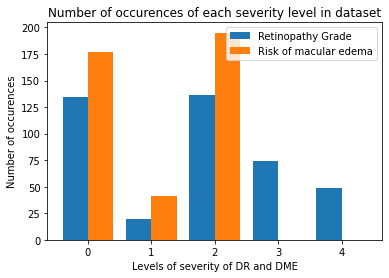

In [ ]:
#creates empty lists
DR_array = []
DME_array = []
unique_values_array_DR = []
unique_values_array_DME = []

#stores classes for DR and DME
DR_array_Index = [0, 1, 2, 3, 4]
DME_array_Index = [0, 1, 2, 3]

#stores the values of DR and DME from y_train in lists
for item in np.array(y_train):
  DR_array.append(item[1])
  DME_array.append(item[2])

#counts the number of values for each class for DR and DME
unique_values_DR = pd.Index(DR_array).value_counts()
unique_values_DME = pd.Index(DME_array).value_counts()

#creates series with values counted above for DR and DME
for i in range(5):
  unique_values_array_DR.append(pd.Series(unique_values_DR)[i])

for i in range(3):
  unique_values_array_DME.append(pd.Series(unique_values_DME)[i])

#adds 2 0's at the end of the DME series to match it's size with DR
for i in range(2):
  unique_values_array_DME.append(0)

#plots a bar graph for the number of occurences of each severity level in the dataset
X_axis = np.arange(5)
plt.bar(X_axis-0.2, unique_values_array_DR, 0.4, label = "Retinopathy Grade")
plt.bar(X_axis+0.2, unique_values_array_DME, 0.4, label = "Risk of macular edema")
plt.xticks(X_axis, DR_array_Index)
plt.xlabel("Levels of severity of DR and DME")
plt.ylabel("Number of occurences")
plt.title("Number of occurences of each severity level in dataset")
plt.legend()
plt.show()

In [ ]:
#gets all the file names for the train images
fileNames_train = []
for item in np.array(y_train):
  fileNames_train.append(item[0] + ".jpg")
print(fileNames_train)

['IDRiD_001.jpg', 'IDRiD_002.jpg', 'IDRiD_003.jpg', 'IDRiD_004.jpg', 'IDRiD_005.jpg', 'IDRiD_006.jpg', 'IDRiD_007.jpg', 'IDRiD_008.jpg', 'IDRiD_009.jpg', 'IDRiD_010.jpg', 'IDRiD_011.jpg', 'IDRiD_012.jpg', 'IDRiD_013.jpg', 'IDRiD_014.jpg', 'IDRiD_015.jpg', 'IDRiD_016.jpg', 'IDRiD_017.jpg', 'IDRiD_018.jpg', 'IDRiD_019.jpg', 'IDRiD_020.jpg', 'IDRiD_021.jpg', 'IDRiD_022.jpg', 'IDRiD_023.jpg', 'IDRiD_024.jpg', 'IDRiD_025.jpg', 'IDRiD_026.jpg', 'IDRiD_027.jpg', 'IDRiD_028.jpg', 'IDRiD_029.jpg', 'IDRiD_030.jpg', 'IDRiD_031.jpg', 'IDRiD_032.jpg', 'IDRiD_033.jpg', 'IDRiD_034.jpg', 'IDRiD_035.jpg', 'IDRiD_036.jpg', 'IDRiD_037.jpg', 'IDRiD_038.jpg', 'IDRiD_039.jpg', 'IDRiD_040.jpg', 'IDRiD_041.jpg', 'IDRiD_042.jpg', 'IDRiD_043.jpg', 'IDRiD_044.jpg', 'IDRiD_045.jpg', 'IDRiD_046.jpg', 'IDRiD_047.jpg', 'IDRiD_048.jpg', 'IDRiD_049.jpg', 'IDRiD_050.jpg', 'IDRiD_051.jpg', 'IDRiD_052.jpg', 'IDRiD_053.jpg', 'IDRiD_054.jpg', 'IDRiD_055.jpg', 'IDRiD_056.jpg', 'IDRiD_057.jpg', 'IDRiD_058.jpg', 'IDRiD_059.jp

In [ ]:
#gets all the file names for the test images
fileNames_test = []
for item in np.array(y_test):
  fileNames_test.append(item[0] + ".jpg")
print(fileNames_test)

['IDRiD_001.jpg', 'IDRiD_002.jpg', 'IDRiD_003.jpg', 'IDRiD_004.jpg', 'IDRiD_005.jpg', 'IDRiD_006.jpg', 'IDRiD_007.jpg', 'IDRiD_008.jpg', 'IDRiD_009.jpg', 'IDRiD_010.jpg', 'IDRiD_011.jpg', 'IDRiD_012.jpg', 'IDRiD_013.jpg', 'IDRiD_014.jpg', 'IDRiD_015.jpg', 'IDRiD_016.jpg', 'IDRiD_017.jpg', 'IDRiD_018.jpg', 'IDRiD_019.jpg', 'IDRiD_020.jpg', 'IDRiD_021.jpg', 'IDRiD_022.jpg', 'IDRiD_023.jpg', 'IDRiD_024.jpg', 'IDRiD_025.jpg', 'IDRiD_026.jpg', 'IDRiD_027.jpg', 'IDRiD_028.jpg', 'IDRiD_029.jpg', 'IDRiD_030.jpg', 'IDRiD_031.jpg', 'IDRiD_032.jpg', 'IDRiD_033.jpg', 'IDRiD_034.jpg', 'IDRiD_035.jpg', 'IDRiD_036.jpg', 'IDRiD_037.jpg', 'IDRiD_038.jpg', 'IDRiD_039.jpg', 'IDRiD_040.jpg', 'IDRiD_041.jpg', 'IDRiD_042.jpg', 'IDRiD_043.jpg', 'IDRiD_044.jpg', 'IDRiD_045.jpg', 'IDRiD_046.jpg', 'IDRiD_047.jpg', 'IDRiD_048.jpg', 'IDRiD_049.jpg', 'IDRiD_050.jpg', 'IDRiD_051.jpg', 'IDRiD_052.jpg', 'IDRiD_053.jpg', 'IDRiD_054.jpg', 'IDRiD_055.jpg', 'IDRiD_056.jpg', 'IDRiD_057.jpg', 'IDRiD_058.jpg', 'IDRiD_059.jp

In [ ]:
#defines a function that converts image to grayscale version from the image path
def convertToGrayscale(image_path):
    grayScaleImages = []
    img = Image.open(image_path)
    imgGray = img.convert('L')
    grayScaleImages.append(imgGray)
    return grayScaleImages

In [ ]:
#plots 5 images using the grayscale function from training data
grayScaleImages_array_train = []
for i in range(5):
  grayScaleImagesList_train = convertToGrayscale('/content/B. Disease Grading/1. Original Images/a. Training Set/' + fileNames_train[i])
  grayScaleImages_array_train.append(grayScaleImagesList_train[0])
  plt.imshow(grayScaleImages_array_train[i])
  plt.show()
  print()

In [ ]:
model = Sequential()
model.add(InceptionResNetV2(input_shape=(264,264,3),include_top=True,weights=None))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Creating an output layer
model.add(Dense(units= 5, activation='softmax'))

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(X_test,y_test,epochs=20,batch_size=16,validation_split=0.2)

ValueError: ignored

In [ ]:
model.summary()

In [ ]:
#creates a model using InceptionResNetV2 without dropout for DR and prints summary
base_model_1 = InceptionResNetV2(include_top=False)
base_model_1.trainable = False
x = base_model_1.output
x = GlobalAveragePooling2D()(x)
new_layer_1 = Dense(10, activation = 'relu')(x)
new_layer_1 = Dense(5, activation = 'softmax')(new_layer_1)
model1=Model(inputs = base_model_1.inputs, outputs = new_layer_1)
base_model_1.summary()

In [ ]:
#creates a model using InceptionResNetV2 with dropout for DR and prints summary
base_model_1_dropout = InceptionResNetV2(include_top=False)
base_model_1_dropout.trainable = False
x = base_model_1_dropout.output
x = GlobalAveragePooling2D()(x)
new_layer_1_dropout = Dense(10, activation = 'relu')(x)
new_layer_1_dropout = Dropout(0.5)(new_layer_1_dropout)
new_layer_1_dropout = Dense(5, activation = 'softmax')(new_layer_1_dropout)
model1_dropout=Model(inputs = base_model_1_dropout.inputs, outputs = new_layer_1_dropout)
base_model_1_dropout.summary()

In [ ]:
#creates a model using InceptionResNetV2 without dropout for DME and prints summary
base_model_2 = InceptionResNetV2(include_top=False)
base_model_2.trainable = False
x = base_model_2.output
x = GlobalAveragePooling2D()(x)
new_layer_2 = Dense(10, activation = 'relu')(x)
new_layer_2 = Dense(3, activation = 'softmax')(new_layer_2)
model2=Model(inputs = base_model_2.inputs, outputs = new_layer_2)
base_model_2.summary()

In [ ]:
#creates a model using InceptionResNetV2 with dropout for DME and prints summary
base_model_2_dropout = InceptionResNetV2(include_top=False)
base_model_2_dropout.trainable = False
x = base_model_2_dropout.output
x = GlobalAveragePooling2D()(x)
new_layer_2_dropout = Dense(10, activation = 'relu')(x)
new_layer_2_dropout = Dropout(0.5)(new_layer_2_dropout)
new_layer_2_dropout = Dense(3, activation = 'softmax')(new_layer_2_dropout)
model2_dropout=Model(inputs = base_model_2_dropout.inputs, outputs = new_layer_2_dropout)
base_model_2_dropout.summary()

In [ ]:
#compiles all the models defined above
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#prints arrays with train and test values of DR
DR_array_train = DR_array
DR_array_test = []
for item in np.array(y_test):
  DR_array_test.append(item[1])
print(DR_array_train)
print(DR_array_test)

[3, 3, 2, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 4, 2, 4, 2, 2, 2, 1, 4, 3, 4, 3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 4, 4, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 3, 3, 4, 2, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 4, 2, 2, 2, 2, 4, 2, 3, 4, 4, 2, 2, 2, 2, 3, 4, 2, 3, 3, 4, 3, 2, 2, 4, 1, 2, 2, 3, 2, 3, 4, 3, 2, 3, 3, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 2, 0, 2, 2, 2, 2, 4, 0, 2, 3, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 4, 4, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 0, 2, 3, 4, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 3, 2, 3, 4, 0, 0, 0, 0, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 0, 0, 4, 1, 1, 0, 2, 2, 0, 3, 0, 0, 3, 2, 1, 1, 2, 1, 0, 3, 0, 3, 3, 2, 2, 0, 4, 3, 0, 0, 0, 0, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 0, 2, 2, 

In [ ]:
#prints arrays with train and test values of DME
DME_array_train = DME_array
DME_array_test = []
for item in np.array(y_test):
  DME_array_test.append(item[2])
print(DME_array_train)
print(DME_array_test)

[2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 

In [ ]:
#converts all variables involved in training to arrays
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
DR_array_train = np.asarray(DR_array_train).astype(np.float32)
DR_array_test = np.asarray(DR_array_test).astype(np.float32)
DME_array_train = np.asarray(DME_array_train).astype(np.float32)
DME_array_test = np.asarray(DME_array_test).astype(np.float32)

In [ ]:
#creates one hot encoded vectors for DR
one_hot_encoded_vectors_train = tf.keras.utils.to_categorical(DR_array_train)
one_hot_encoded_vectors_test = tf.keras.utils.to_categorical(DR_array_test)

In [ ]:
#creates one hot encoded vectors for DME
one_hot_encoded_vectors_train_DME = tf.keras.utils.to_categorical(DME_array_train)
one_hot_encoded_vectors_test_DME = tf.keras.utils.to_categorical(DME_array_test)

In [ ]:
#initializes all variables
tf.compat.v1.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
#trains model for DR without dropout
model1.fit(X_train, one_hot_encoded_vectors_train, validation_data=(X_test, one_hot_encoded_vectors_test), epochs = 10)

Epoch 1/10
13/13 [==============================] - 45s 2s/step - loss: 60.9903 - accuracy: 0.0799 - val_loss: 11.4957 - val_accuracy: 0.1456
Epoch 2/10
13/13 [==============================] - 12s 945ms/step - loss: 11.7605 - accuracy: 0.1162 - val_loss: 1.9267 - val_accuracy: 0.0680
Epoch 3/10
13/13 [==============================] - 12s 944ms/step - loss: 1.6112 - accuracy: 0.3123 - val_loss: 1.5985 - val_accuracy: 0.3107
Epoch 4/10
13/13 [==============================] - 12s 944ms/step - loss: 1.5968 - accuracy: 0.3293 - val_loss: 1.5959 - val_accuracy: 0.3107
Epoch 5/10
13/13 [==============================] - 12s 943ms/step - loss: 1.5941 - accuracy: 0.3293 - val_loss: 1.5933 - val_accuracy: 0.3107
Epoch 6/10
13/13 [==============================] - 12s 943ms/step - loss: 1.5912 - accuracy: 0.3293 - val_loss: 1.5907 - val_accuracy: 0.3107
Epoch 7/10
13/13 [==============================] - 12s 942ms/step - loss: 1.5885 - accuracy: 0.3293 - val_loss: 1.5879 - val_accuracy: 0.3107

In [ ]:
#trains model for DR with dropout
model1_dropout.fit(X_train, one_hot_encoded_vectors_train, validation_data=(X_test, one_hot_encoded_vectors_test), epochs = 10)

Epoch 1/10
13/13 [==============================] - 28s 1s/step - loss: 17.2337 - accuracy: 0.2615 - val_loss: 1.6073 - val_accuracy: 0.3301
Epoch 2/10
13/13 [==============================] - 12s 947ms/step - loss: 1.6051 - accuracy: 0.3245 - val_loss: 1.6025 - val_accuracy: 0.3301
Epoch 3/10
13/13 [==============================] - 12s 947ms/step - loss: 1.6000 - accuracy: 0.3245 - val_loss: 1.5974 - val_accuracy: 0.3301
Epoch 4/10
13/13 [==============================] - 12s 945ms/step - loss: 1.5946 - accuracy: 0.3245 - val_loss: 1.5925 - val_accuracy: 0.3301
Epoch 5/10
13/13 [==============================] - 12s 946ms/step - loss: 1.5897 - accuracy: 0.3245 - val_loss: 1.5876 - val_accuracy: 0.3301
Epoch 6/10
13/13 [==============================] - 12s 943ms/step - loss: 1.5846 - accuracy: 0.3245 - val_loss: 1.5829 - val_accuracy: 0.3301
Epoch 7/10
13/13 [==============================] - 12s 944ms/step - loss: 1.5798 - accuracy: 0.3245 - val_loss: 1.5783 - val_accuracy: 0.3301
E

In [ ]:
#trains model for DME without dropout
model2.fit(X_train, one_hot_encoded_vectors_train_DME, validation_data=(X_test, one_hot_encoded_vectors_test_DME), epochs = 10)

Epoch 1/10
13/13 [==============================] - 28s 1s/step - loss: 27.7808 - accuracy: 0.2857 - val_loss: 20.5203 - val_accuracy: 0.4369
Epoch 2/10
13/13 [==============================] - 12s 946ms/step - loss: 8.9589 - accuracy: 0.2712 - val_loss: 1.0956 - val_accuracy: 0.4660
Epoch 3/10
13/13 [==============================] - 12s 945ms/step - loss: 1.0941 - accuracy: 0.4722 - val_loss: 1.0926 - val_accuracy: 0.4660
Epoch 4/10
13/13 [==============================] - 12s 942ms/step - loss: 1.0913 - accuracy: 0.4722 - val_loss: 1.0899 - val_accuracy: 0.4660
Epoch 5/10
13/13 [==============================] - 12s 943ms/step - loss: 1.0886 - accuracy: 0.4722 - val_loss: 1.0871 - val_accuracy: 0.4660
Epoch 6/10
13/13 [==============================] - 12s 942ms/step - loss: 1.0858 - accuracy: 0.4722 - val_loss: 1.0842 - val_accuracy: 0.4660
Epoch 7/10
13/13 [==============================] - 12s 941ms/step - loss: 1.0829 - accuracy: 0.4722 - val_loss: 1.0814 - val_accuracy: 0.4660


In [ ]:
#trains model for DME with dropout
model2_dropout.fit(X_train, one_hot_encoded_vectors_train_DME, validation_data=(X_test, one_hot_encoded_vectors_test_DME), epochs = 10)

Epoch 1/10
13/13 [==============================] - 29s 1s/step - loss: 9.8636 - accuracy: 0.2736 - val_loss: 1.0987 - val_accuracy: 0.0971
Epoch 2/10
13/13 [==============================] - 12s 958ms/step - loss: 1.0967 - accuracy: 0.3947 - val_loss: 1.0942 - val_accuracy: 0.4660
Epoch 3/10
13/13 [==============================] - 12s 945ms/step - loss: 1.0921 - accuracy: 0.4019 - val_loss: 1.0892 - val_accuracy: 0.4660
Epoch 4/10
13/13 [==============================] - 12s 943ms/step - loss: 1.0871 - accuracy: 0.4722 - val_loss: 1.0843 - val_accuracy: 0.4660
Epoch 5/10
13/13 [==============================] - 12s 944ms/step - loss: 1.0821 - accuracy: 0.4722 - val_loss: 1.0796 - val_accuracy: 0.4660
Epoch 6/10
13/13 [==============================] - 12s 944ms/step - loss: 1.0776 - accuracy: 0.4722 - val_loss: 1.0749 - val_accuracy: 0.4660
Epoch 7/10
13/13 [==============================] - 12s 943ms/step - loss: 1.0731 - accuracy: 0.4722 - val_loss: 1.0703 - val_accuracy: 0.4660
Ep

In [ ]:
#stores the loss and accuracy of each model in variables
model1_accuracy = model1.evaluate(X_test, one_hot_encoded_vectors_test)
model1_dropout_accuracy = model1_dropout.evaluate(X_test, one_hot_encoded_vectors_test)
model2_accuracy = model2.evaluate(X_test, one_hot_encoded_vectors_test_DME)
model2_dropout_accuracy = model2_dropout.evaluate(X_test, one_hot_encoded_vectors_test_DME)

4/4 [==============================] - 2s 578ms/step - loss: 1.0576 - accuracy: 0.4660


In [ ]:
#creates lists for the x-axis holding the names of all the models and y-axis with the validation accuracy for each
Models = ['Model1', 'Model1_Dropout', 'Model2', 'Model2_Dropout']
Models_test_accuracy = [model1_accuracy[1], model1_dropout_accuracy[1], model2_accuracy[1], model2_dropout_accuracy[1]]

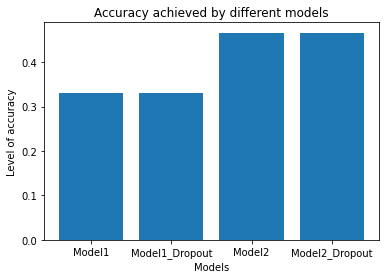

In [ ]:
#plots a bar graph with axes defines above
plt.bar(Models, Models_test_accuracy)
plt.xlabel("Models")
plt.ylabel("Level of accuracy")
plt.title("Accuracy achieved by different models")
plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)